In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
data_dir = '/content/drive/MyDrive/Dataset'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

In [ ]:
print(os.listdir(data_dir))

# Check the structure of the dataset
print("Dataset Contents:")
print(os.listdir(data_dir))
print("-" * 50)

# Loop through each subfolder (train, val, test)
for subfolder in ['Train', 'Validate', 'Test']:
    subfolder_path = os.path.join(data_dir, subfolder)
    print(f"Checking folder: {subfolder}")
    print("-" * 50)

    # Loop through each category (earthquake, flood) in the subfolder
    for category in os.listdir(subfolder_path):
        category_path = os.path.join(subfolder_path, category)

        # Skip non-directory files like .DS_Store
        if not os.path.isdir(category_path):
            print(f"  Skipping non-directory file: {category_path}")
            continue

        print(f"  Checking category: {category}")
        print(f"  Path: {category_path}")

        # Get number of images in the category folder
        print(f"  Number of images: {len(os.listdir(category_path))}")
        print("-" * 30)

        # Loop through each image in the category folder
        for image in os.listdir(category_path):
            image_path = os.path.join(category_path, image)

            try:
                # Validate image format
                img = cv2.imread(image_path)  # Try reading the image
                tip = imghdr.what(image_path)  # Check the file type

                if tip not in image_exts:
                    print(f"Invalid image format: {image_path}")
                    os.remove(image_path)  # Remove invalid image
            except Exception as e:
                print(f"Issue with image: {image_path}")
                print(f"Error: {e}")

['flood_test.jpg', 'earthquake_test.jpg', '.DS_Store', 'Validate', 'Test', 'Train', 'Artificial_Intelligence.ipynb', 'Prediction.ipynb']
Dataset Contents:
['flood_test.jpg', 'earthquake_test.jpg', '.DS_Store', 'Validate', 'Test', 'Train', 'Artificial_Intelligence.ipynb', 'Prediction.ipynb']
--------------------------------------------------
Checking folder: Train
--------------------------------------------------
  Skipping non-directory file: /content/drive/MyDrive/Dataset/Train/.DS_Store
  Checking category: Earthquake
  Path: /content/drive/MyDrive/Dataset/Train/Earthquake
  Number of images: 750
------------------------------
  Checking category: Flood
  Path: /content/drive/MyDrive/Dataset/Train/Flood
  Number of images: 750
------------------------------
Checking folder: Validate
--------------------------------------------------
  Skipping non-directory file: /content/drive/MyDrive/Dataset/Validate/.DS_Store
  Checking category: Flood
  Path: /content/drive/MyDrive/Dataset/Valid

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [ ]:
# Data augmentation
train_data_gen = ImageDataGenerator(
    rescale=1./255,       # Normalize pixel values
    rotation_range=20,    # Random rotations between -20 and 20 deg
    width_shift_range=0.1,  # Horizontal shifts
    height_shift_range=0.1, # Vertical shifts
    shear_range=0.1,      # Shear transformations
    zoom_range=0.1,       # Random zooms
    horizontal_flip=True  # Flip images horizontally
)

In [ ]:
train_data = train_data_gen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/Train',  # Path to 'train' folder
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'   # Binary classification
)

Found 1500 images belonging to 2 classes.


In [ ]:
# Validation data generator (no augmentation, only rescaling)
val_data_gen = ImageDataGenerator(rescale=1./255)

# Validation data
val_data = val_data_gen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/Validate',  # Path to 'val' folder
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'   # Binary classification
)

Found 322 images belonging to 2 classes.


In [ ]:
# Test data generator (no augmentation, only rescaling)
test_data_gen = ImageDataGenerator(rescale=1./255)

# Test data
test_data = test_data_gen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/Test',  # Path to 'test' folder
    target_size=IMG_SIZE,
    batch_size=1,         # Use batch size of 1 for evaluation
    class_mode='binary',  # Binary classification
    shuffle=False         # Do not shuffle for consistent evaluation
)

Found 324 images belonging to 2 classes.


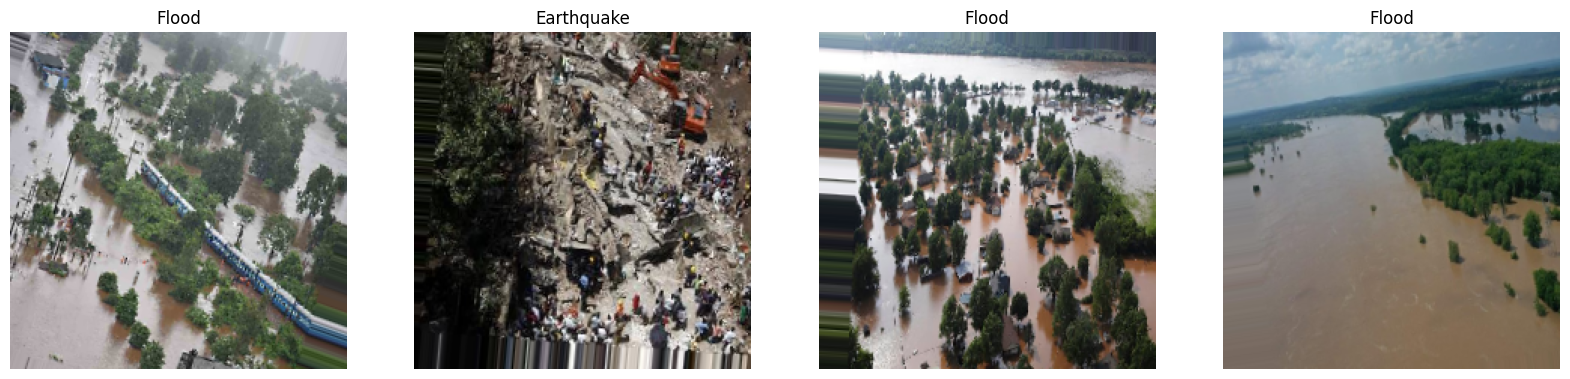

In [ ]:
# Fetch a batch of training images
batch = next(train_data)

# Plot 4 images from the batch
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):  # Display the first 4 images
    ax[idx].imshow(img)
    ax[idx].title.set_text('Flood' if batch[1][idx] == 1 elif 'Earthquake' batch[1][idx] == 2 else "something else")  # Add class labels
    ax[idx].axis('off')  # Turn off axes for cleaner visualization
plt.show()

In [ ]:
  # definition of our model
  model = Sequential([
      # Convolutional Layer 1
      Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # 32 filters, 3x3 kernel, use relu to remove. negative values/noise
      MaxPooling2D((2, 2)), # picking the most important details therefore reducing the size


      # Convolutional Layer 2
      Conv2D(64, (3, 3), activation='relu'),  # 64 filters, 3x3 kernel
      MaxPooling2D((2, 2)),

      # Convolutional Layer 3
      Conv2D(128, (3, 3), activation='relu'),  # 128 filters, 3x3 kernel
      MaxPooling2D((2, 2)),

      # Flattening Layer
      Flatten(), # converts the reduced feature maps into a single vector for classification.

      # Fully Connected Layer
      Dense(128, activation='relu'),  # Dense layer with 128 neurons, learn based on our final extracted features to make predictions
      Dropout(0.5),  # Dropout so that our model doesnt become too confident about specific features and helps it generalize better to new images.
      Dense(1, activation='sigmoid')  # 1 Output layer for binary classification 0 - 1, probabilistic
  ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # for binary classification
              metrics=['accuracy'])

model.summary()  # the structure of the model
# Adaptive Moment Estimation - optimizer, helps the neural network learn by adjusting the weights of the model during training.
# It does this by reducing the loss, which measures how far the model’s predictions are from the actual answers.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.5542 - loss: 1.2926 - val_accuracy: 0.5373 - val_loss: 0.7756
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 67s 849ms/step - accuracy: 0.7029 - loss: 0.5852 - val_accuracy: 0.5870 - val_loss: 0.6752
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 870ms/step - accuracy: 0.6288 - loss: 0.6584 - val_accuracy: 0.6460 - val_loss: 0.6472
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 848ms/step - accuracy: 0.7941 - loss: 0.4862 - val_accuracy: 0.7019 - val_loss: 0.6289
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 814ms/step - accuracy: 0.8179 - loss: 0.4348 - val_accuracy: 0.8012 - val_loss: 0.4180
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 786ms/step - accuracy: 0.8552 - loss: 0.3570 - val_accuracy: 0.8696 - val_loss: 0.3360
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 45s 824ms/step - accuracy: 0.8650 - loss: 0.3230 - val_accuracy: 0.8509 - val_loss: 0.3474
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 45s 817ms/step - accuracy: 0.8667 - loss: 0.3324 - val_accuracy: 0.8696 -

In [ ]:
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 371ms/step - accuracy: 0.8752 - loss: 0.3014
Validation Loss: 0.3149210512638092
Validation Accuracy: 0.8757764101028442


In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

324/324 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8278 - loss: 0.4045
Test Loss: 0.3964625298976898
Test Accuracy: 0.8364197611808777


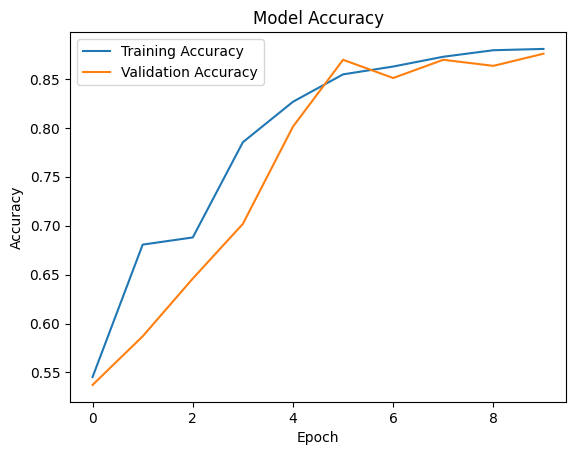

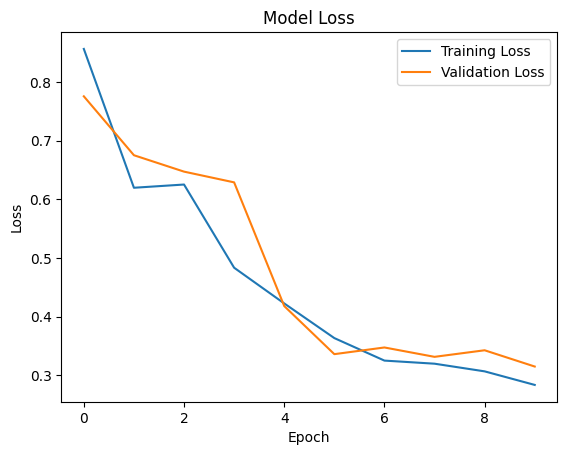

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save('flood_earthquake_classifier.h5')
